In [1]:
from sklearn.linear_model import Ridge

from model_utils import load_dataset, run_experiment, print_results, plot_residuals

In [2]:
dataset = load_dataset()

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:18<00:00,  1.24it/s]


In [5]:
for test_score in ['math_4', 'math_8', 'reading_4', 'reading_8']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)

In [6]:
dataset

,engagement;pct_access,engagement;engagement_index,districts;locale,districts;state,broadband;wired_over_25,broadband;avg_mbps,broadband;frac_access,broadband;lowest_price,districts;pct_black/hispanic,districts;pct_free/reduced,...,engagement;avg_SDO,engagement;med_CM,engagement;med_LC,engagement;med_LC_CM_SDO,engagement;med_Missing,engagement;med_SDO,testscores;math_4_delta,testscores;math_8_delta,testscores;reading_4_delta,testscores;reading_8_delta
9007,1.964617,567.28607,City,Arizona,0.82173,24.11994,0.23648,15.5471,4,NaN,...,2338.686585,23.710,23.40,25.860,7.54,37.720,-5.0,-11.0,-1.0,1.0
1570,0.518174,84.132317,Suburb,California,1.23725,23.10062,0.2465,9.0179,1,1.0,...,692.672180,9.160,9.66,11.660,2.00,33.585,-2.0,-8.0,-4.0,-2.0
2074,0.109114,34.732466,Suburb,California,1.23725,23.10062,0.2465,9.0179,2,1.0,...,27.147659,1.670,2.28,2.470,0.45,1.800,-2.0,-8.0,-4.0,-2.0
2106,0.207801,66.760789,Suburb,California,1.23725,23.10062,0.2465,9.0179,1,0.0,...,186.552288,6.780,3.79,9.625,1.66,3.150,-2.0,-8.0,-4.0,-2.0
2172,0.81368,282.176262,City,California,1.36228,23.72792,0.2486,8.72419,0,0.0,...,2197.199267,7.755,10.40,19.130,1.46,9.005,-8.0,-3.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,0.141797,24.367871,City,Washington,1.05923,21.19728,0.24797,14.27715,1,2.0,...,384.795328,0.740,1.76,1.150,0.19,2.170,-1.0,-9.0,2.0,-2.0
7457,0.312187,73.94003,City,Washington,1.05923,21.19728,0.24797,14.27715,2,2.0,...,636.227558,1.130,2.88,3.580,0.35,3.710,-1.0,-9.0,2.0,-2.0
5987,0.730825,181.37924,Suburb,Wisconsin,1.19913,19.45233,0.24867,10.4515,0,0.0,...,1325.292925,7.370,6.88,21.180,1.84,14.800,0.0,-16.0,0.0,-7.0
7752,0.560572,117.393178,Suburb,Wisconsin,1.19913,19.45233,0.24867,10.4515,0,0.0,...,145.666562,3.850,7.03,10.745,1.52,6.810,0.0,-16.0,0.0,-7.0


In [7]:
TARGETS = ['testscores;math_4_delta', 
           'testscores;math_8_delta', 
           'testscores;reading_4_delta', 
           'testscores;reading_8_delta']

<a id='baselines'></a>

# BASELINE REGRESSION MODELS

Average the entire year of data for each district. Same model is used for all states.

This yields only ~173 rows, so we use k-fold Cross Validation to measure model performance. _Note that the folds are constructed to ensure that all data from a given state is in either the test or train split._

### 4th and 8th Grade Test Score Change Baselines

Each baseline trains 4 Ridge regression models ($\alpha = 0.5$), one for each combination of 4th & 8th grade, math & reading test scores, using 5-fold cross-validation. The target variable is the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Baseline 1a___: Uses engagement data only. ([Model](#baseline1a_model) / [Results](#baseline1a_results))
- ___Baseline 1b___: Uses average engagement data only, split into product types. Performed comparably to Baseline 1a. ([Model](#baseline1b_model) / [Results](#baseline1b_results))
- ___Baseline 1c___: Uses median engagement data only, split into product types. Outperformed by Baselines 1a and 1b. ([Model](#baseline1c_model) / [Results](#baseline1c_results))
- ___Baseline 2___: Uses locale type only. Outperformed Baseline 1a/b/c. ([Model](#baseline2_model) / [Results](#baseline2_results))
- ___Baseline 3___: Uses broadband data only. Outperformed by Baseline 1a/b/c. ([Model](#baseline3_model) / [Results](#baseline3_results))
- ___Baseline 4___: Uses socioeconomic data only. Performed relatively well with the caveat that it uses a much smaller dataset than the other baselines due to missing data. ([Model](#baseline4_model) / [Results](#baseline4_results))


<a id='baseline1a_model'></a>

## Baseline 1a: Predict Math and Reading Scores from Engagement Data Only (All product types combined)

[(Back to top)](#baselines)

In [12]:
FEATURES = ['engagement;pct_access', 
            'engagement;engagement_index']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


### Baseline 1a Training Results

In [13]:
print_results(five_fold_results)

,testscores;math_4_delta
train_r2,0.0088
train_root_mean_squared_error,3.7596


,testscores;math_8_delta
train_r2,0.0174
train_root_mean_squared_error,3.5817


,testscores;reading_4_delta
train_r2,0.0103
train_root_mean_squared_error,3.1120


,testscores;reading_8_delta
train_r2,0.0180
train_root_mean_squared_error,3.6355


<a id='baseline1a_results'></a>

### Baseline 1a Testing Results

[(Back to top)](#baselines)

In [14]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-0.0706
test_root_mean_squared_error,3.7130


testscores;math_4_delta: 3.713


,testscores;math_8_delta
test_r2,-0.8169
test_root_mean_squared_error,3.8929


testscores;math_8_delta: 3.8929


,testscores;reading_4_delta
test_r2,-0.2065
test_root_mean_squared_error,3.1636


testscores;reading_4_delta: 3.1636


,testscores;reading_8_delta
test_r2,-0.2985
test_root_mean_squared_error,3.6515


testscores;reading_8_delta: 3.6515


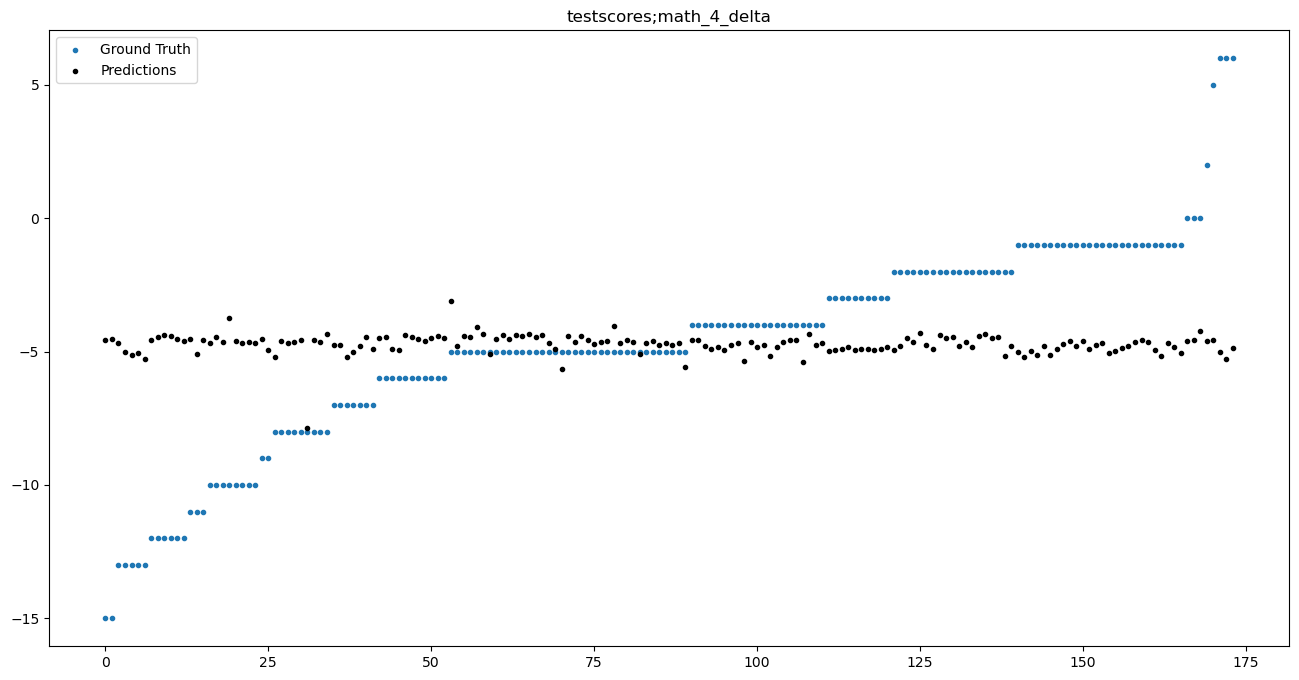

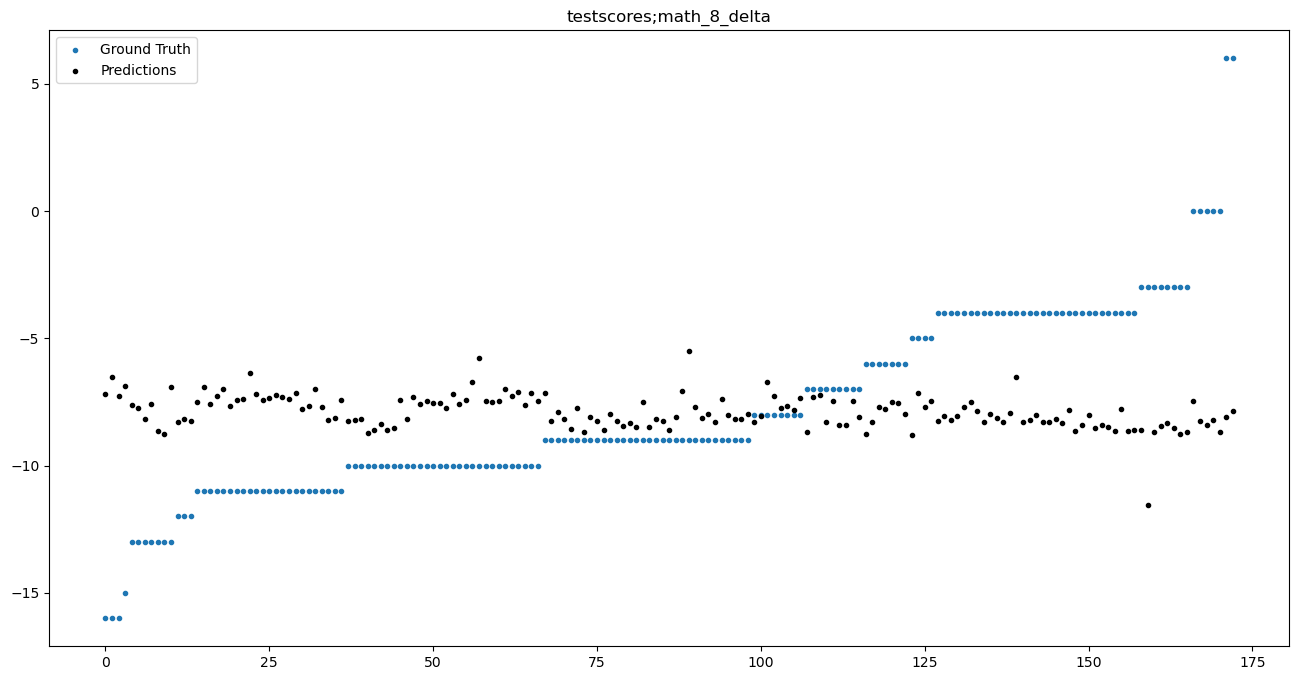

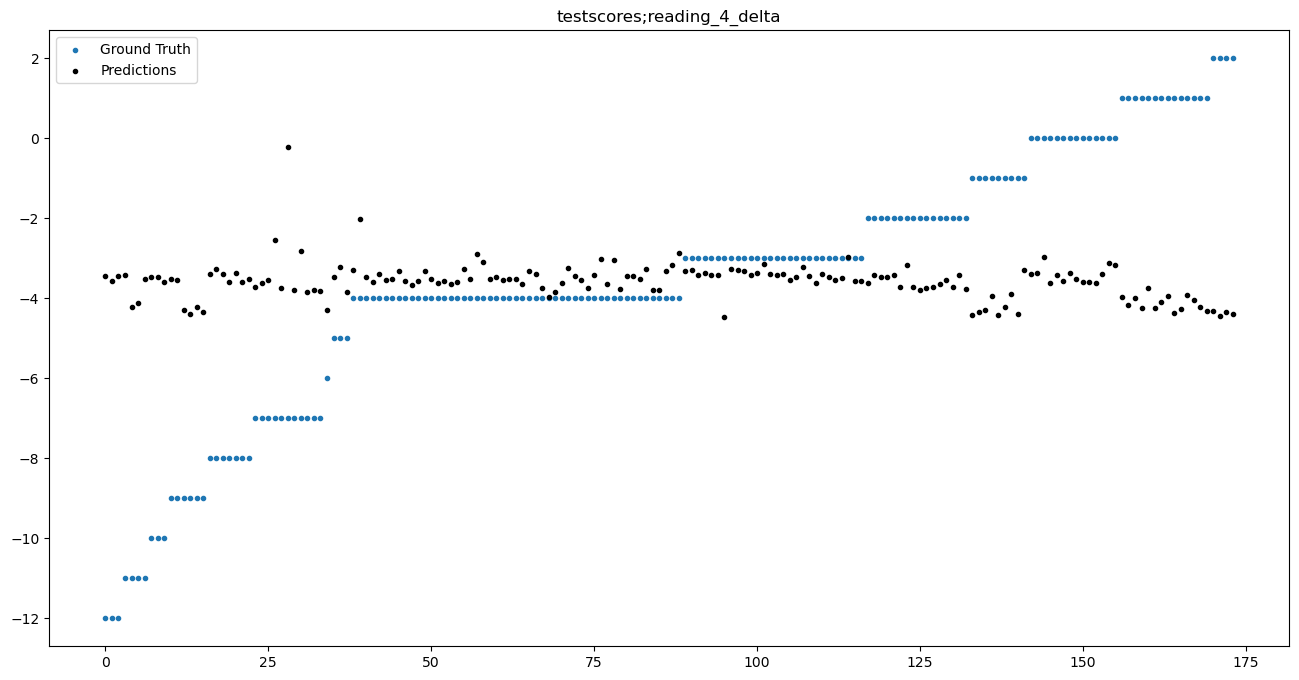

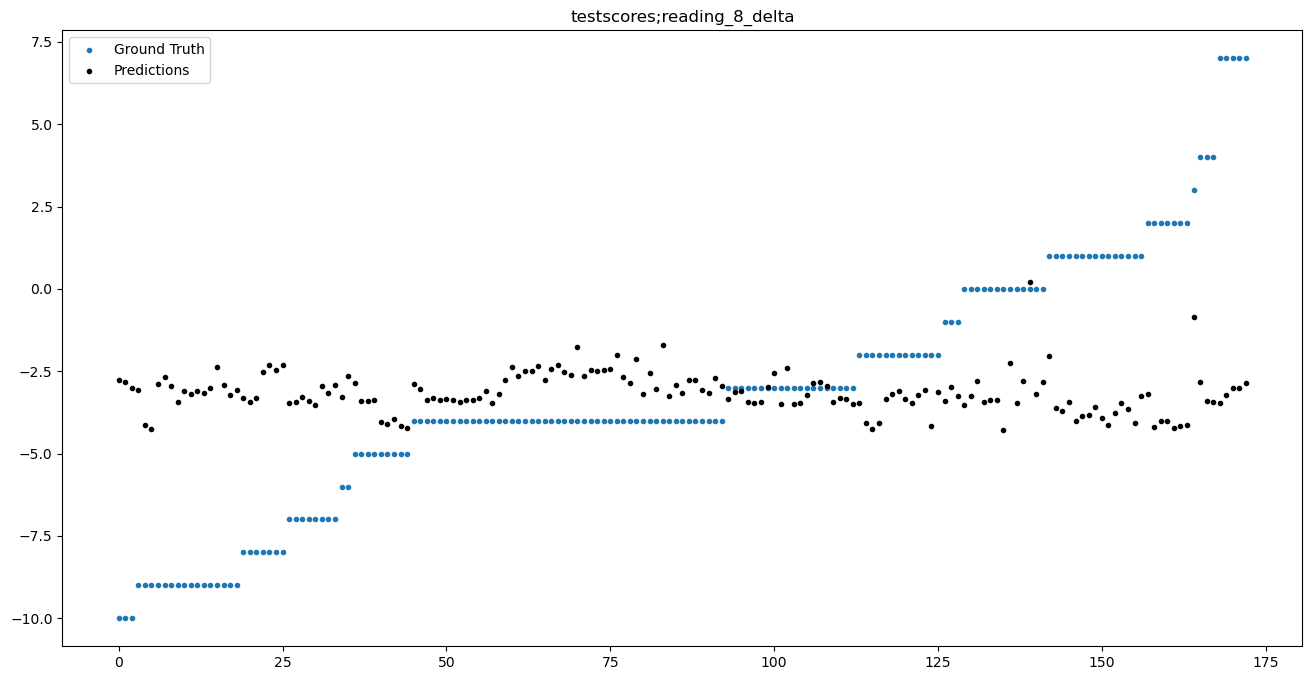

In [15]:
plot_residuals(five_fold_results, None)

<a id='baseline1b_model'></a>

## Baseline 1b: Predict Math and Reading Scores from Engagement Data Only

[(Back to top)](#baselines)

In [16]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


### Baseline 1b Training Results

In [17]:
print_results(five_fold_results)

,testscores;math_4_delta
train_r2,0.0571
train_root_mean_squared_error,3.6653


,testscores;math_8_delta
train_r2,0.0620
train_root_mean_squared_error,3.4979


,testscores;reading_4_delta
train_r2,0.0435
train_root_mean_squared_error,3.0610


,testscores;reading_8_delta
train_r2,0.0894
train_root_mean_squared_error,3.4971


<a id='baseline1b_results'></a>

### Baseline 1b Testing Results

[(Back to top)](#baselines)

In [18]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-0.2682
test_root_mean_squared_error,3.9966


testscores;math_4_delta: 3.9966


,testscores;math_8_delta
test_r2,-0.9654
test_root_mean_squared_error,3.9825


testscores;math_8_delta: 3.9825


,testscores;reading_4_delta
test_r2,-0.3499
test_root_mean_squared_error,3.3554


testscores;reading_4_delta: 3.3554


,testscores;reading_8_delta
test_r2,-0.3792
test_root_mean_squared_error,3.6823


testscores;reading_8_delta: 3.6823


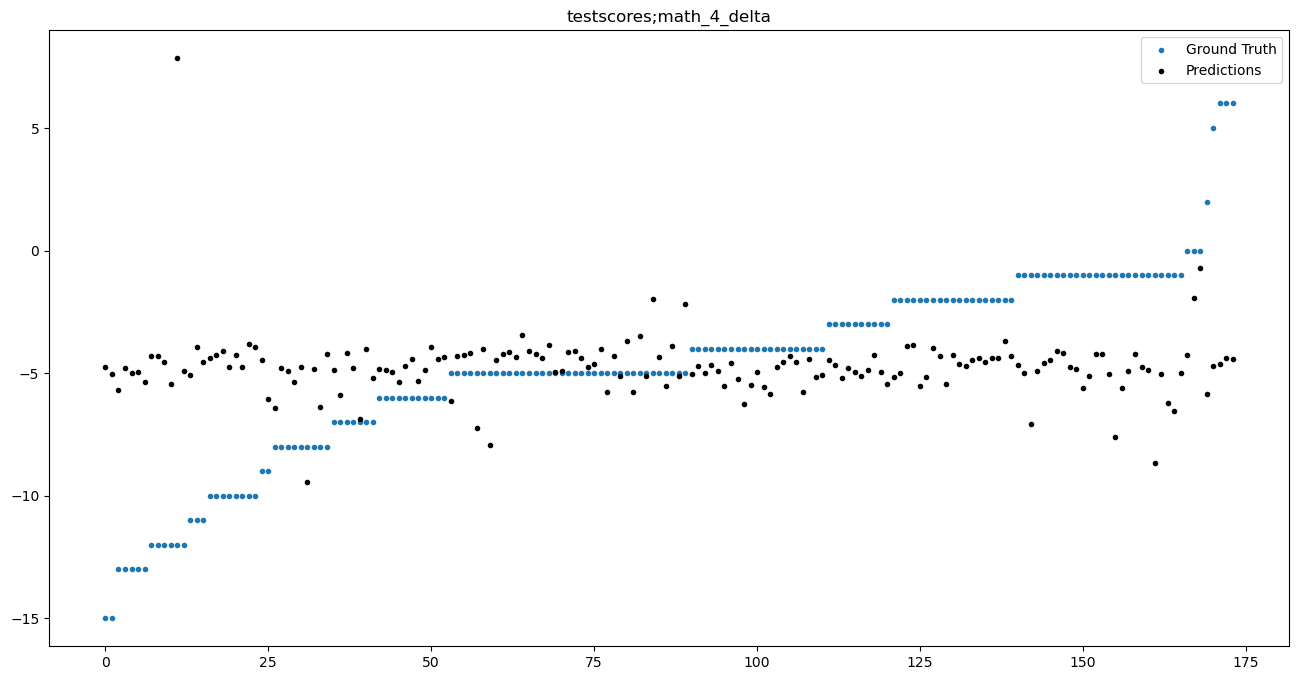

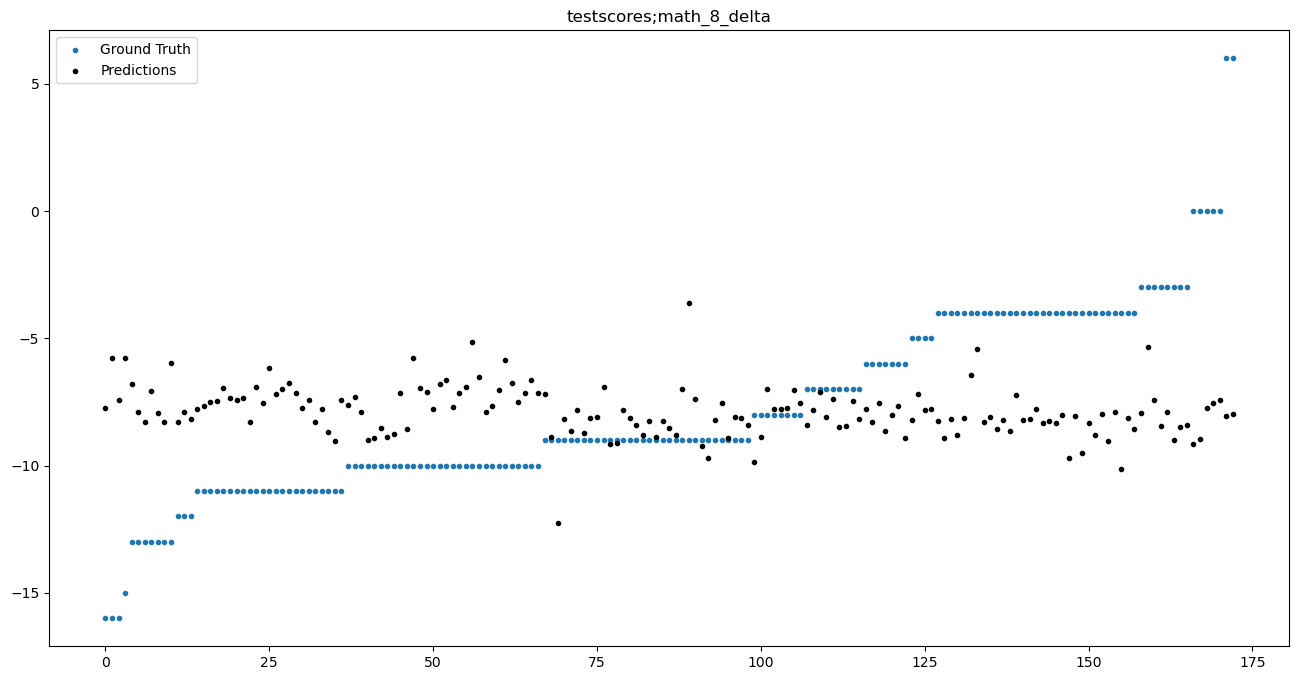

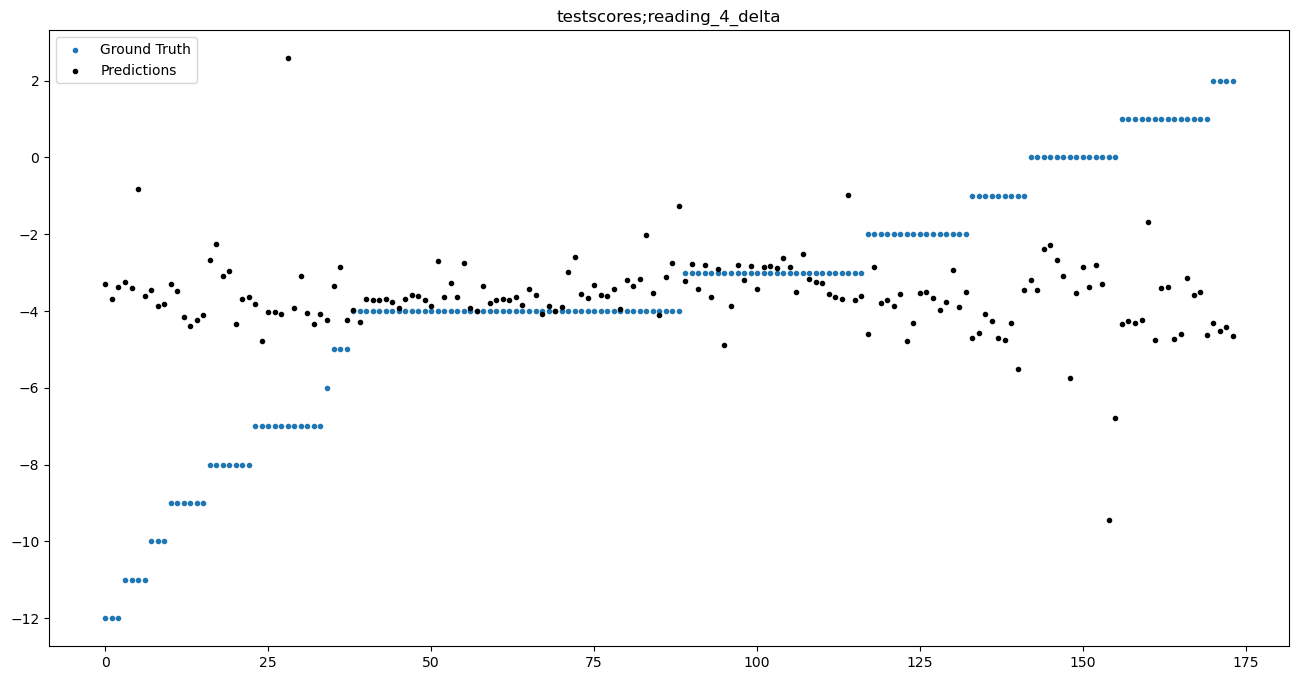

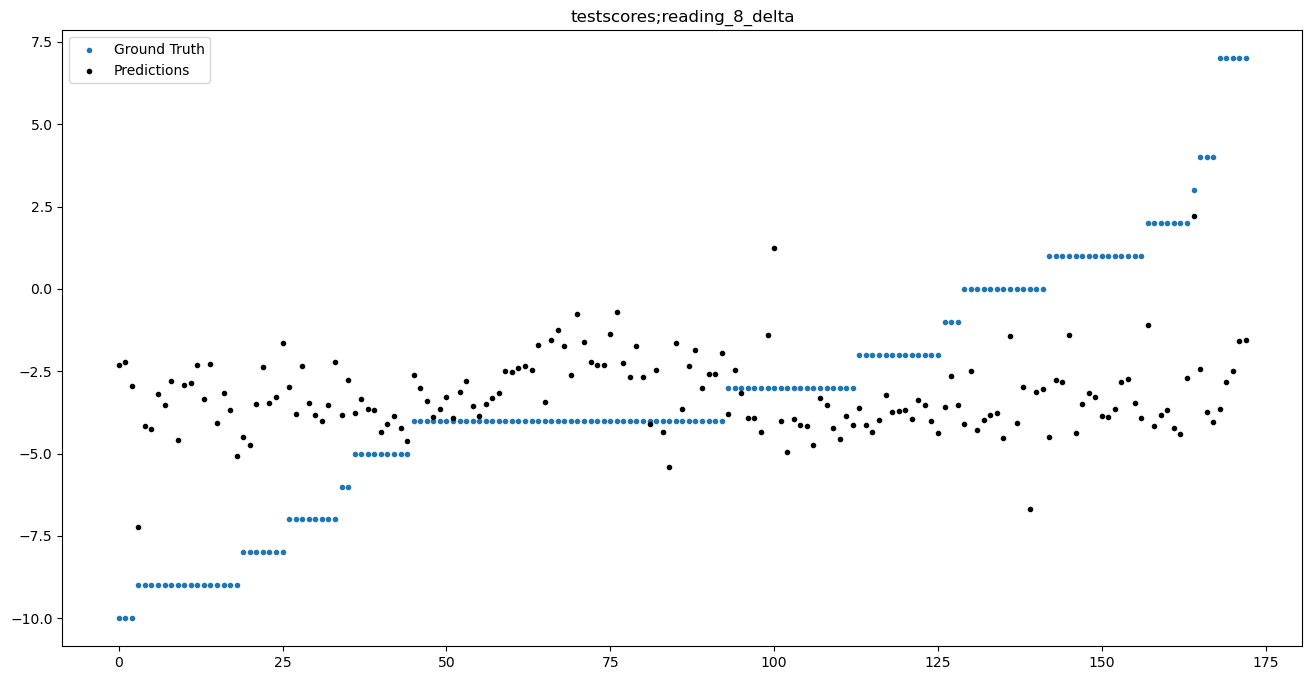

In [19]:
plot_residuals(five_fold_results, None)

<a id='baseline1c_model'></a>

## Baseline 1c: Predict Math and Reading Scores from Engagement Data Only

[(Back to top)](#baselines)

In [20]:
FEATURES = ['engagement;med_SDO',
            'engagement;med_CM',
            'engagement;med_LC', 
            'engagement;med_LC_CM_SDO', 
            'engagement;med_Missing']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


### Baseline 1c Training Results

In [21]:
print_results(five_fold_results)

,testscores;math_4_delta
train_r2,0.0469
train_root_mean_squared_error,3.6867


,testscores;math_8_delta
train_r2,0.0459
train_root_mean_squared_error,3.5293


,testscores;reading_4_delta
train_r2,0.0151
train_root_mean_squared_error,3.1060


,testscores;reading_8_delta
train_r2,0.0563
train_root_mean_squared_error,3.5659


<a id='baseline1c_results'></a>

### Baseline 1c Testing Results

[(Back to top)](#baselines)

In [22]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-0.2539
test_root_mean_squared_error,3.8426


testscores;math_4_delta: 3.8426


,testscores;math_8_delta
test_r2,-0.9375
test_root_mean_squared_error,4.0157


testscores;math_8_delta: 4.0157


,testscores;reading_4_delta
test_r2,-0.2747
test_root_mean_squared_error,3.2608


testscores;reading_4_delta: 3.2608


,testscores;reading_8_delta
test_r2,-0.4361
test_root_mean_squared_error,3.7965


testscores;reading_8_delta: 3.7965


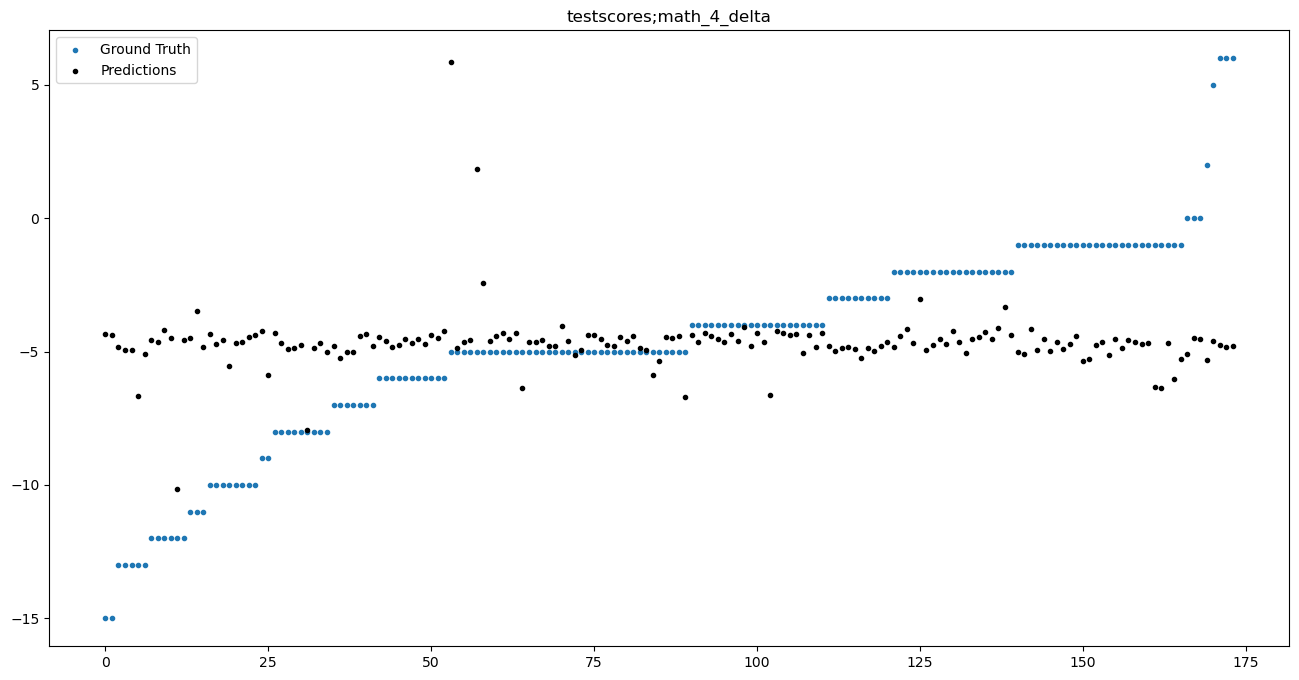

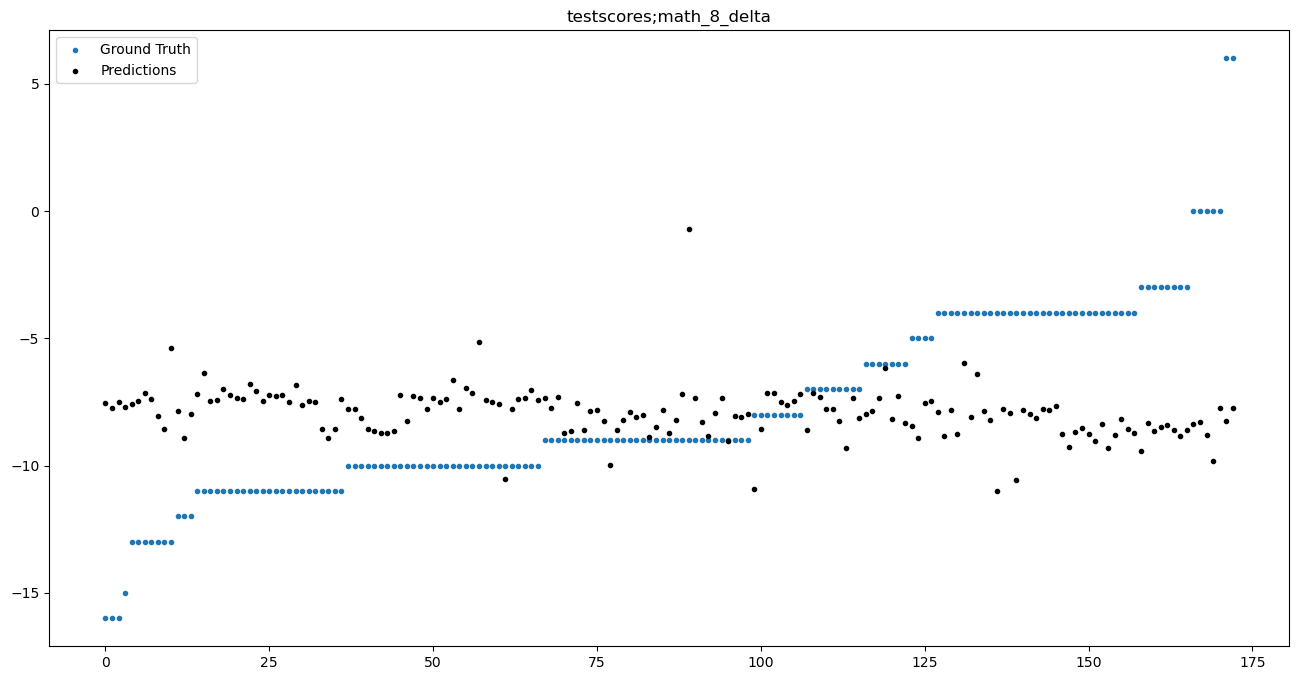

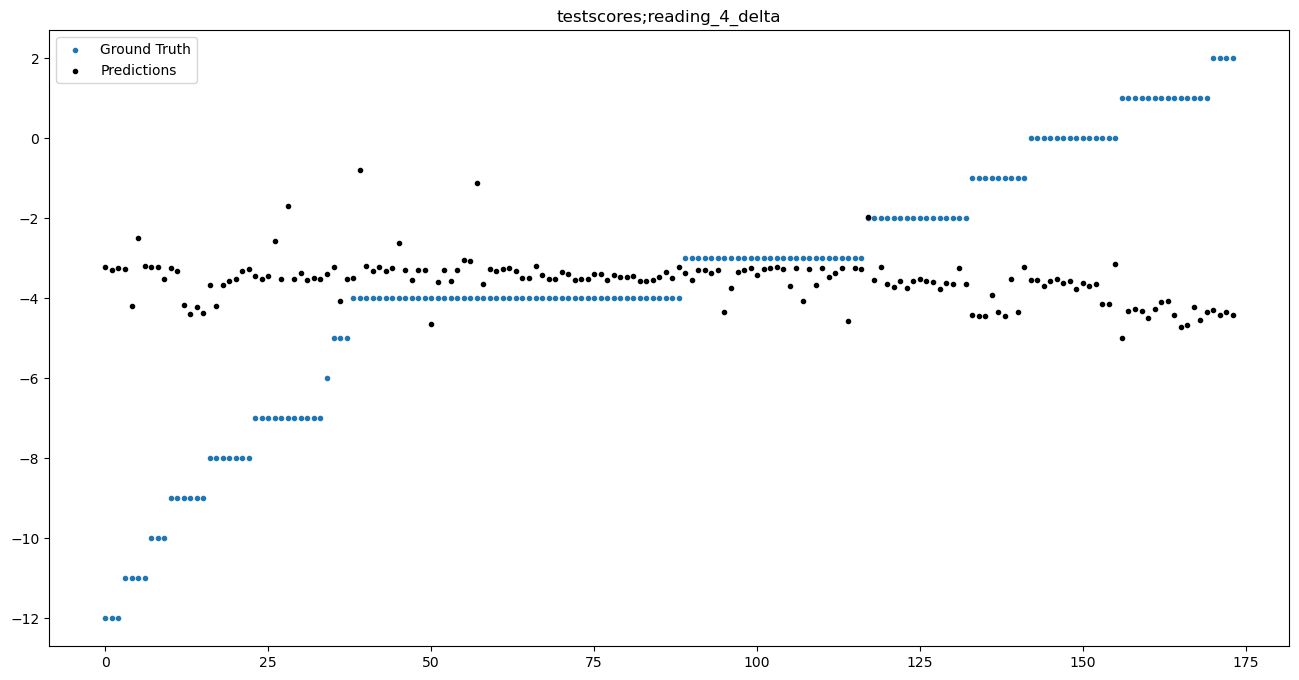

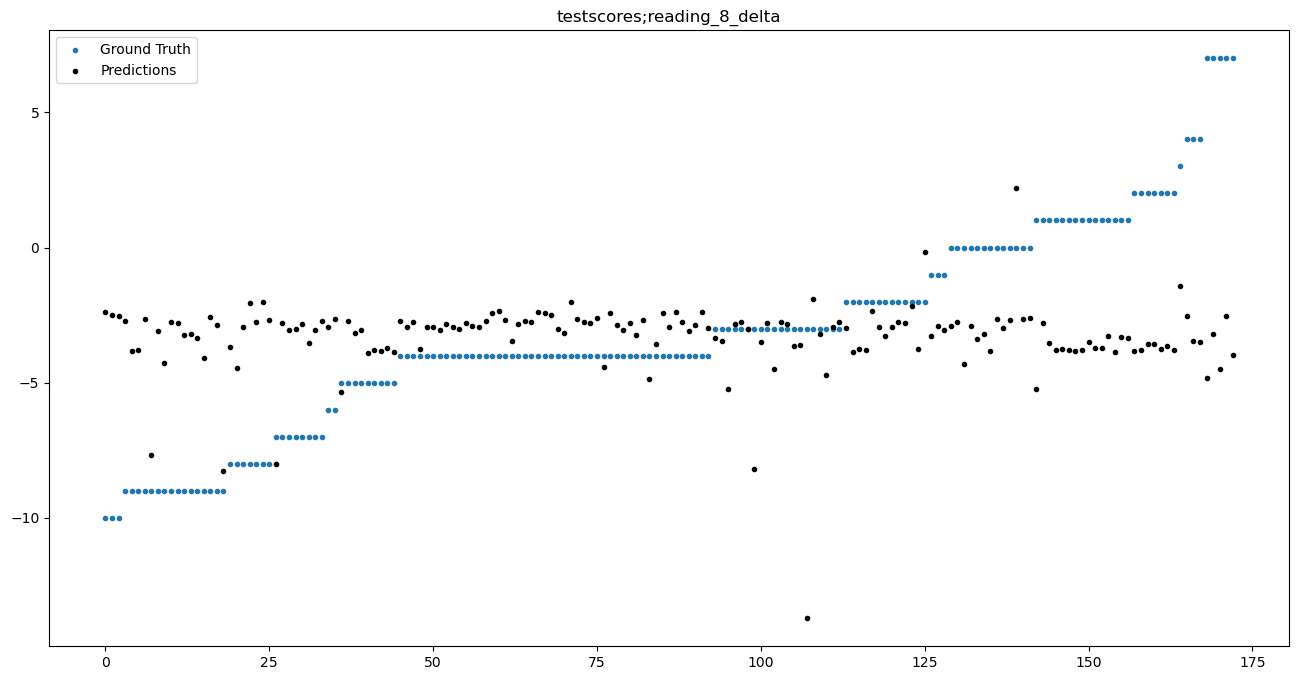

In [23]:
plot_residuals(five_fold_results, None)

<a id='baseline2_model'></a>

## Baseline 2: Predict Math and Reading Scores from Locale Type Only

[(Back to top)](#baselines)

In [24]:
FEATURES = ['districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)
    

Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


### Baseline 2 Training Results

In [25]:
print_results(five_fold_results)

,testscores;math_4_delta
train_r2,0.1362
train_root_mean_squared_error,3.5122


,testscores;math_8_delta
train_r2,0.1079
train_root_mean_squared_error,3.4092


,testscores;reading_4_delta
train_r2,0.0254
train_root_mean_squared_error,3.0919


,testscores;reading_8_delta
train_r2,0.0296
train_root_mean_squared_error,3.6163


<a id='baseline2_results'></a>

### Baseline 2 Testing Results

[(Back to top)](#baselines)

In [26]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-0.1025
test_root_mean_squared_error,3.6548


testscores;math_4_delta: 3.6548


,testscores;math_8_delta
test_r2,-0.7626
test_root_mean_squared_error,3.8632


testscores;math_8_delta: 3.8632


,testscores;reading_4_delta
test_r2,-0.2729
test_root_mean_squared_error,3.2843


testscores;reading_4_delta: 3.2843


,testscores;reading_8_delta
test_r2,-0.5650
test_root_mean_squared_error,4.0402


testscores;reading_8_delta: 4.0402


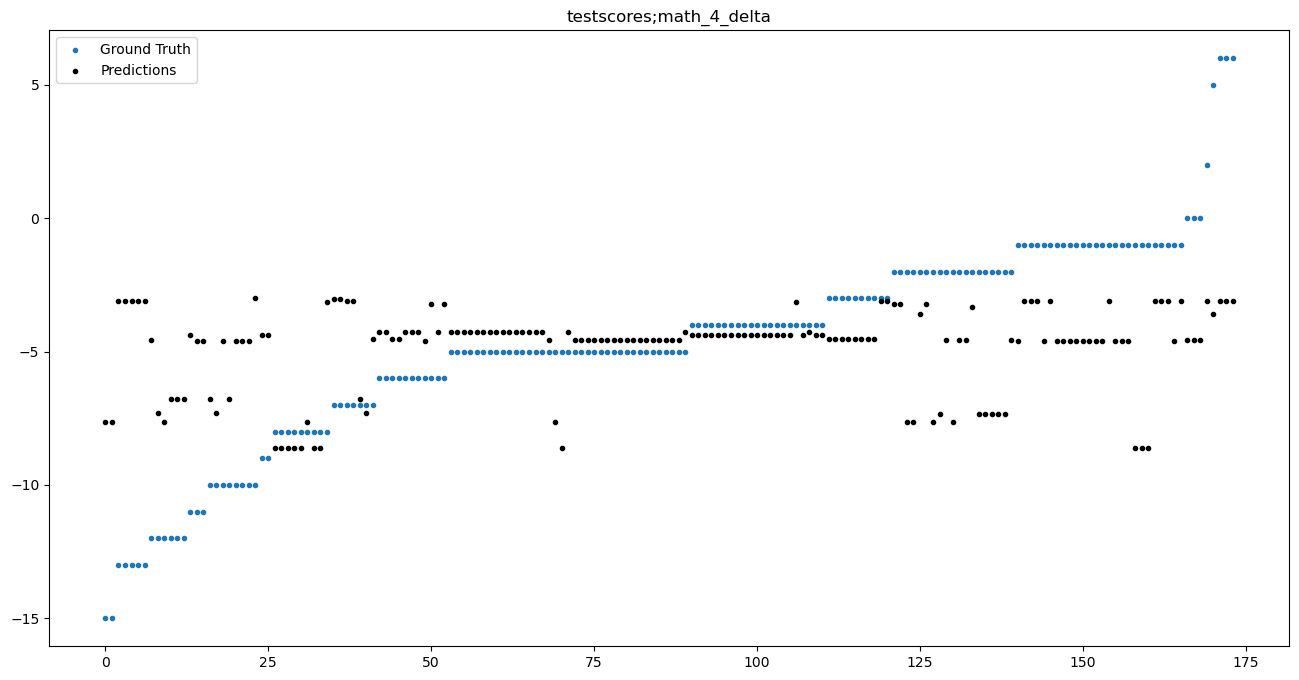

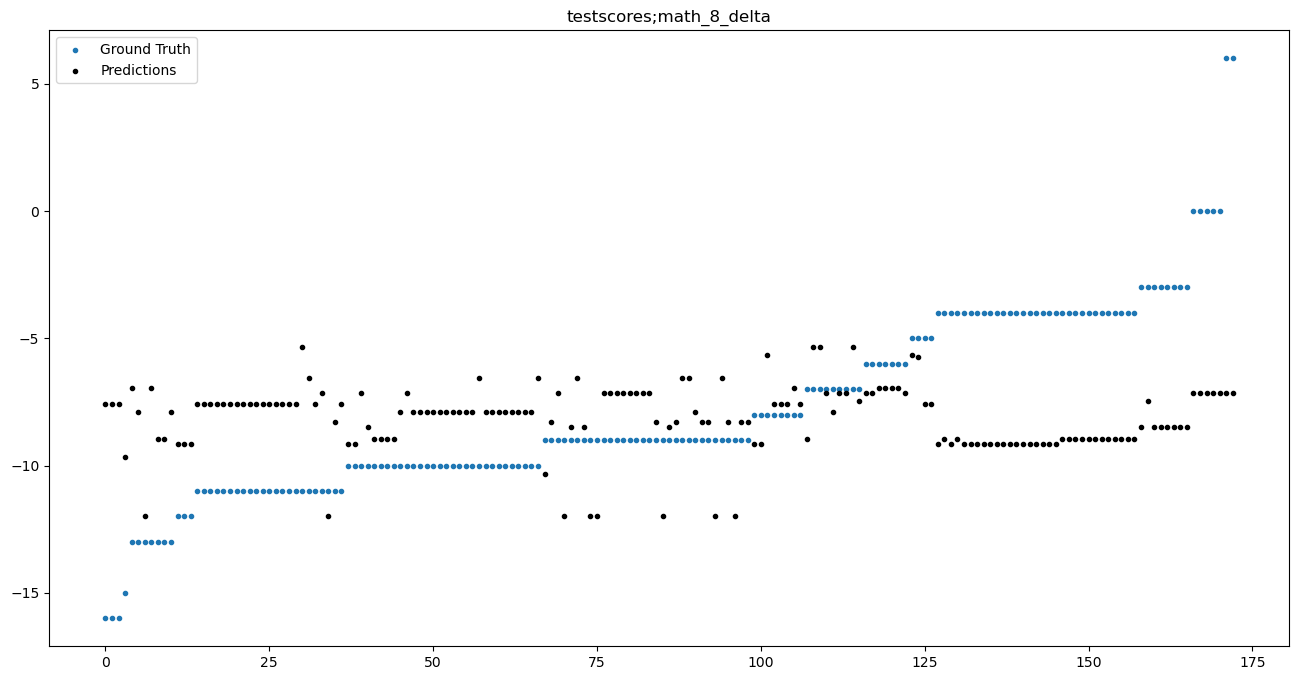

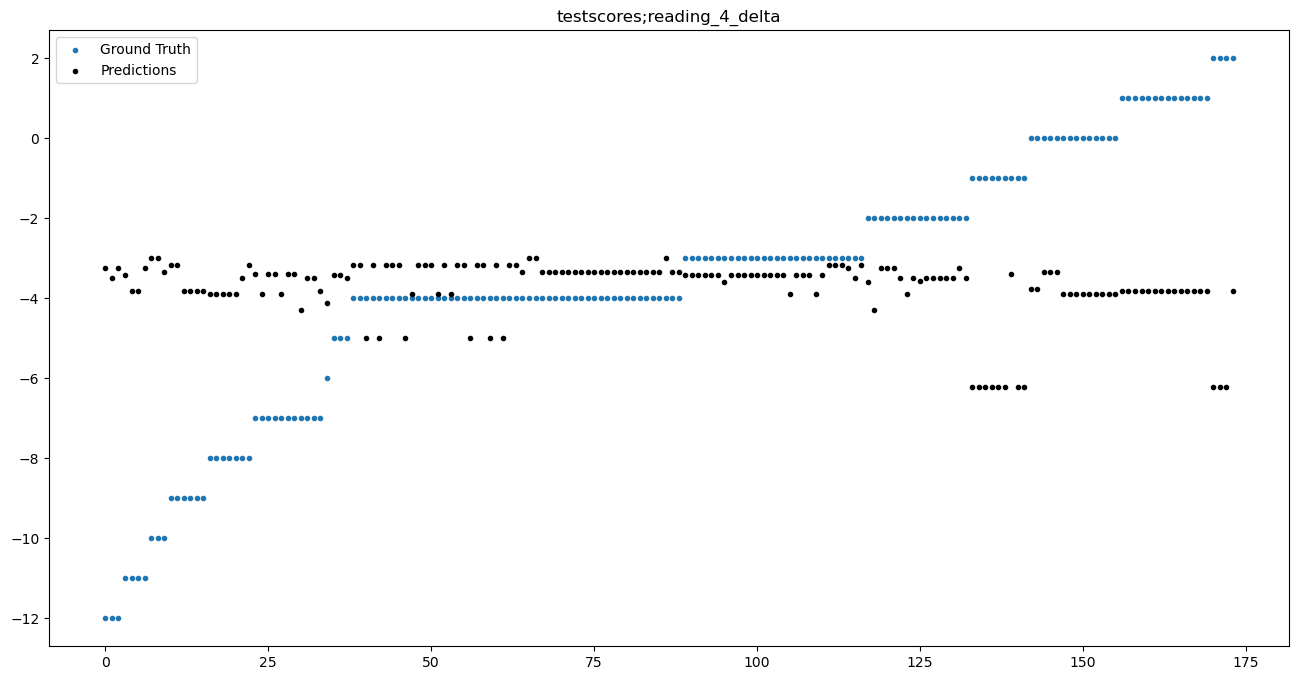

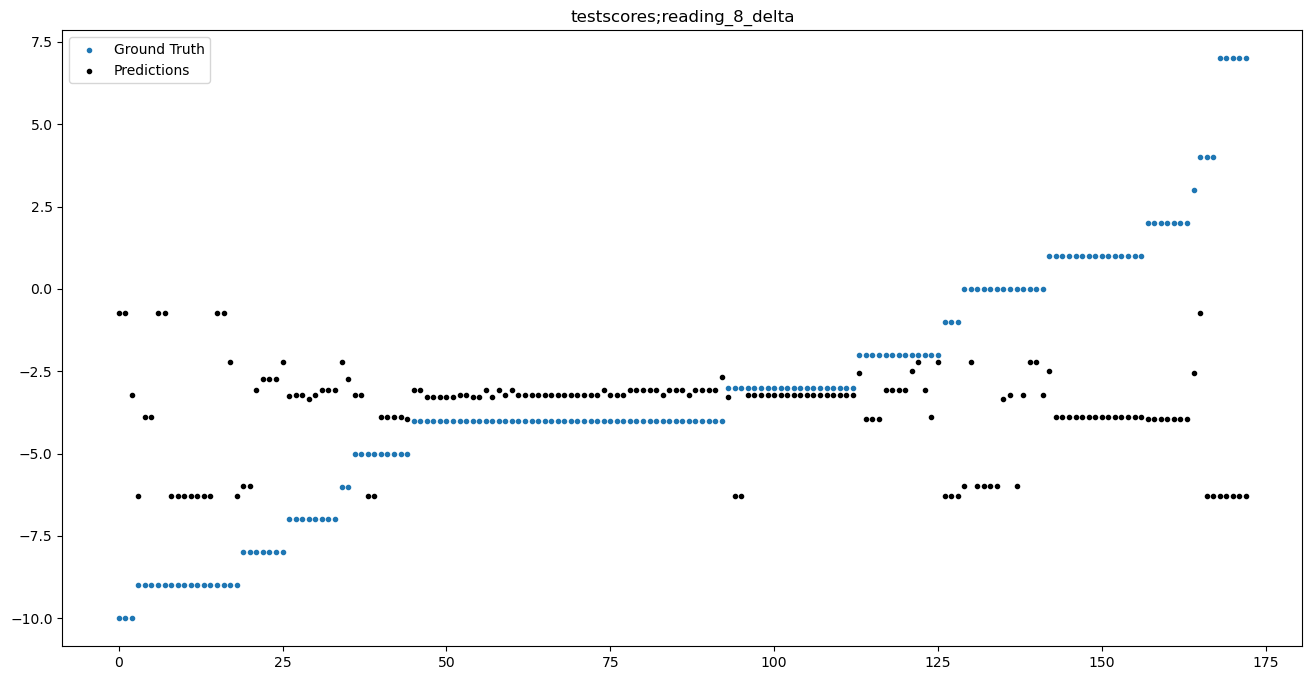

In [27]:
plot_residuals(five_fold_results, None)

<a id='baseline3_model'></a>

## Baseline 3: Predict Math and Reading Scores from Internet Access Data Only

[(Back to top)](#baselines)

In [28]:
FEATURES = ['broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


### Baseline 3 Training Results

In [29]:
print_results(five_fold_results)

,testscores;math_4_delta
train_r2,0.0477
train_root_mean_squared_error,3.6854


,testscores;math_8_delta
train_r2,0.3283
train_root_mean_squared_error,2.9580


,testscores;reading_4_delta
train_r2,0.0958
train_root_mean_squared_error,2.9771


,testscores;reading_8_delta
train_r2,0.2318
train_root_mean_squared_error,3.2137


<a id='baseline3_results'></a>

### Baseline 3 Testing Results

[(Back to top)](#baselines)

In [30]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-0.0434
test_root_mean_squared_error,3.6846


testscores;math_4_delta: 3.6846


,testscores;math_8_delta
test_r2,-1.4305
test_root_mean_squared_error,4.2363


testscores;math_8_delta: 4.2363


,testscores;reading_4_delta
test_r2,-0.4516
test_root_mean_squared_error,3.4691


testscores;reading_4_delta: 3.4691


,testscores;reading_8_delta
test_r2,-0.7278
test_root_mean_squared_error,4.1119


testscores;reading_8_delta: 4.1119


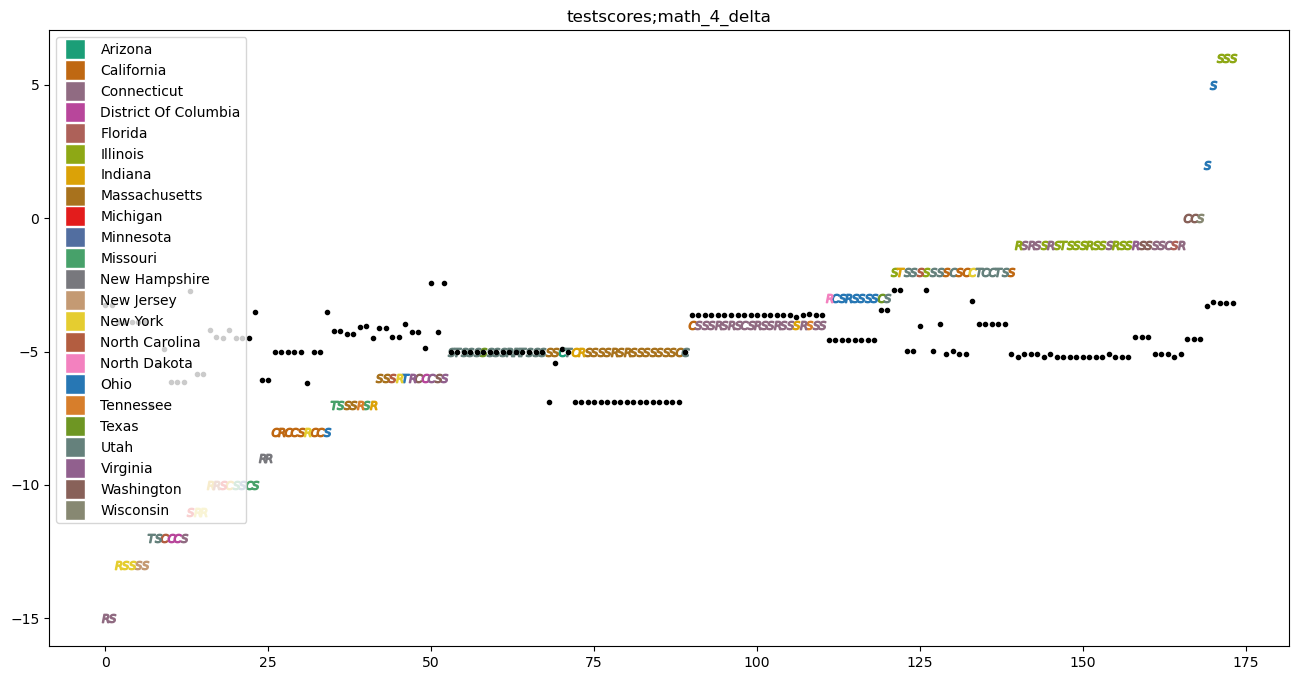

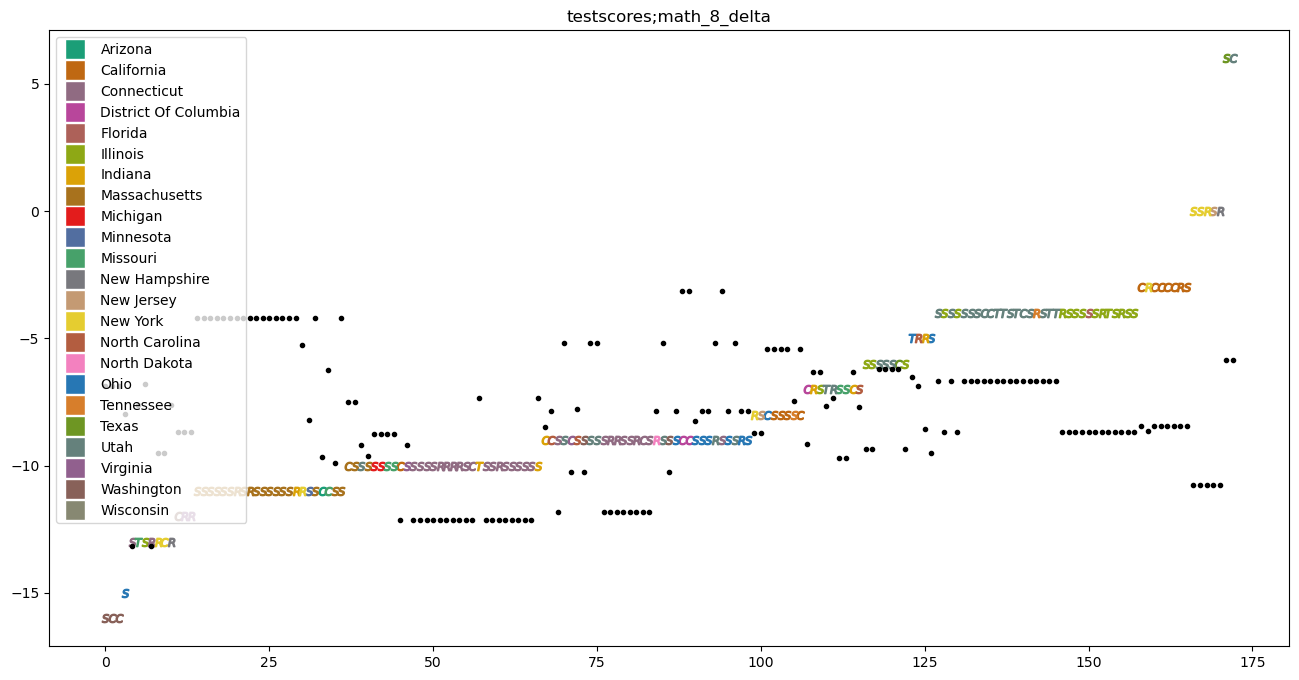

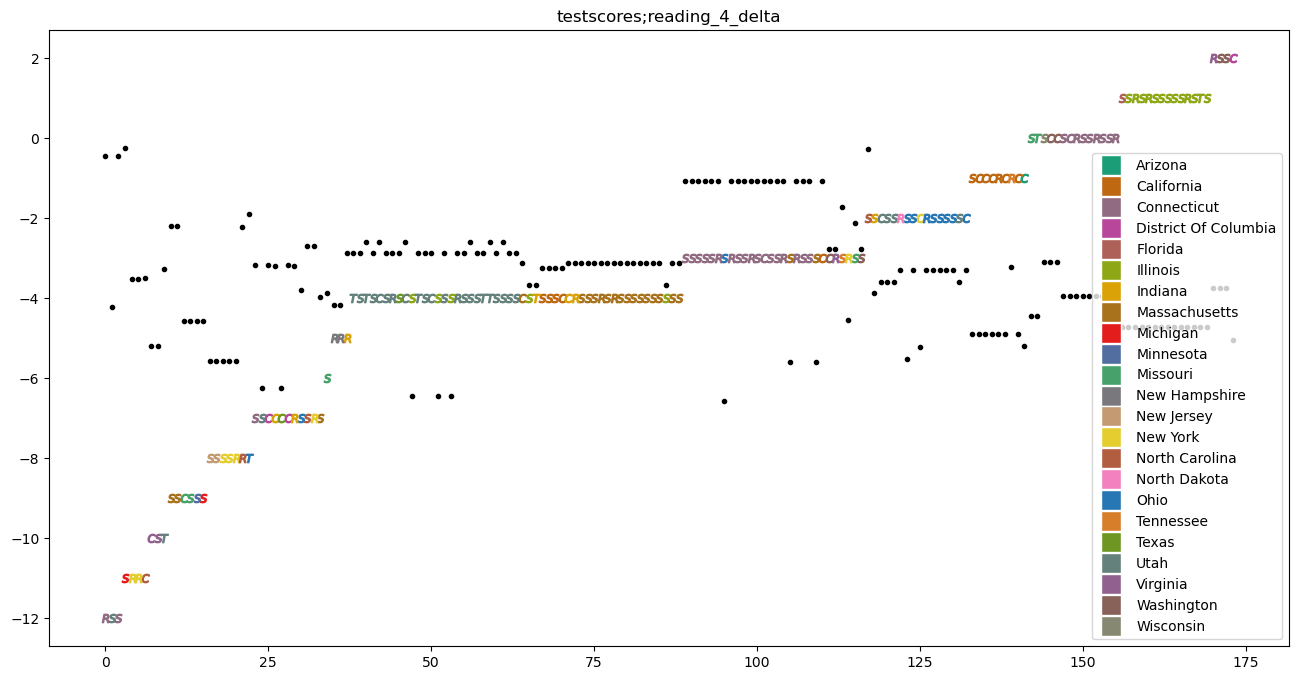

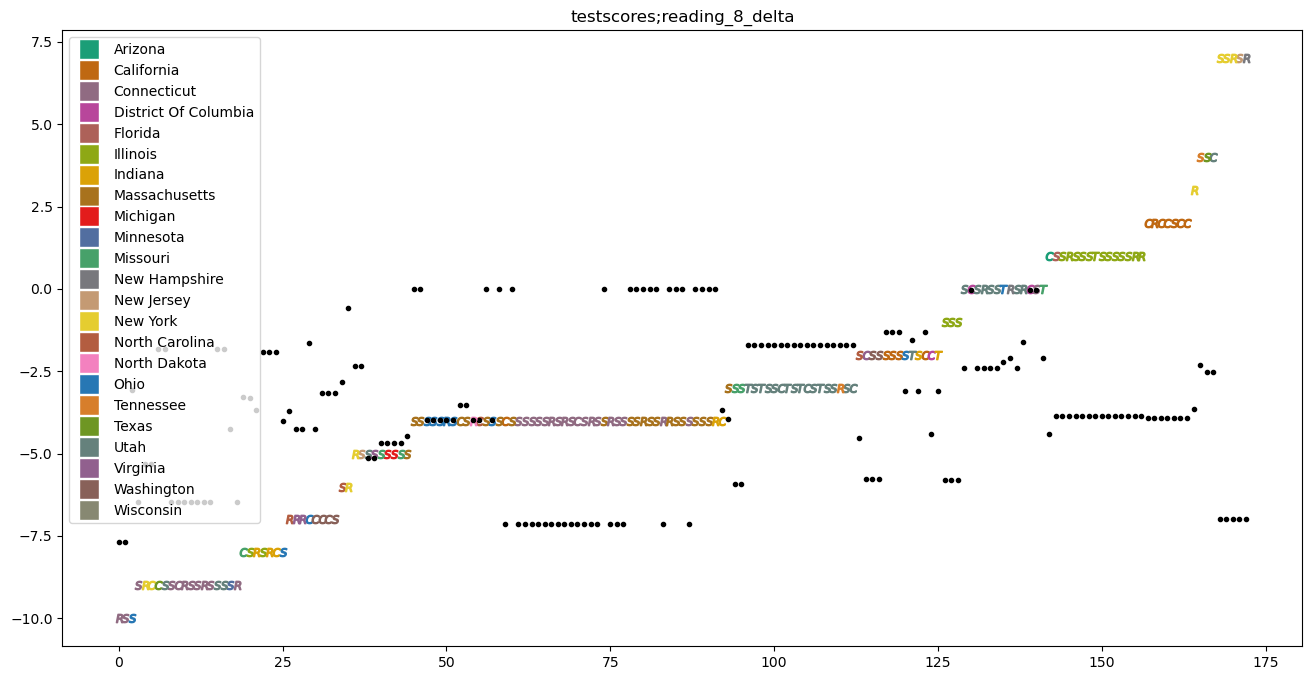

In [31]:
plot_residuals(five_fold_results, dataset)

<a id='baseline4_model'></a>

## Baseline 4: Predict Math and Reading Scores from Socioeconomic Data Only

[(Back to top)](#baselines)

In [32]:
FEATURES = ['districts;pct_black/hispanic', 
            'districts;pct_free/reduced',
            'districts;pp_total_raw']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Ridge(alpha=0.5), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 91 samples after filtering
Dataset for testscores;math_8_delta has 92 samples after filtering
Dataset for testscores;reading_4_delta has 91 samples after filtering
Dataset for testscores;reading_8_delta has 92 samples after filtering


### Baseline 4 Training Results

In [33]:
print_results(five_fold_results)

,testscores;math_4_delta
train_r2,0.1493
train_root_mean_squared_error,3.8371


,testscores;math_8_delta
train_r2,0.0689
train_root_mean_squared_error,3.9380


,testscores;reading_4_delta
train_r2,0.1265
train_root_mean_squared_error,3.3597


,testscores;reading_8_delta
train_r2,0.2706
train_root_mean_squared_error,3.3937


<a id='baseline4_results'></a>

### Baseline 4 Testing Results

[(Back to top)](#baselines)

In [34]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-10.6139
test_root_mean_squared_error,5.2823


testscores;math_4_delta: 5.2823


,testscores;math_8_delta
test_r2,-4.7955
test_root_mean_squared_error,5.1893


testscores;math_8_delta: 5.1893


,testscores;reading_4_delta
test_r2,-1.0321
test_root_mean_squared_error,3.9806


testscores;reading_4_delta: 3.9806


,testscores;reading_8_delta
test_r2,-1.1216
test_root_mean_squared_error,4.0054


testscores;reading_8_delta: 4.0054


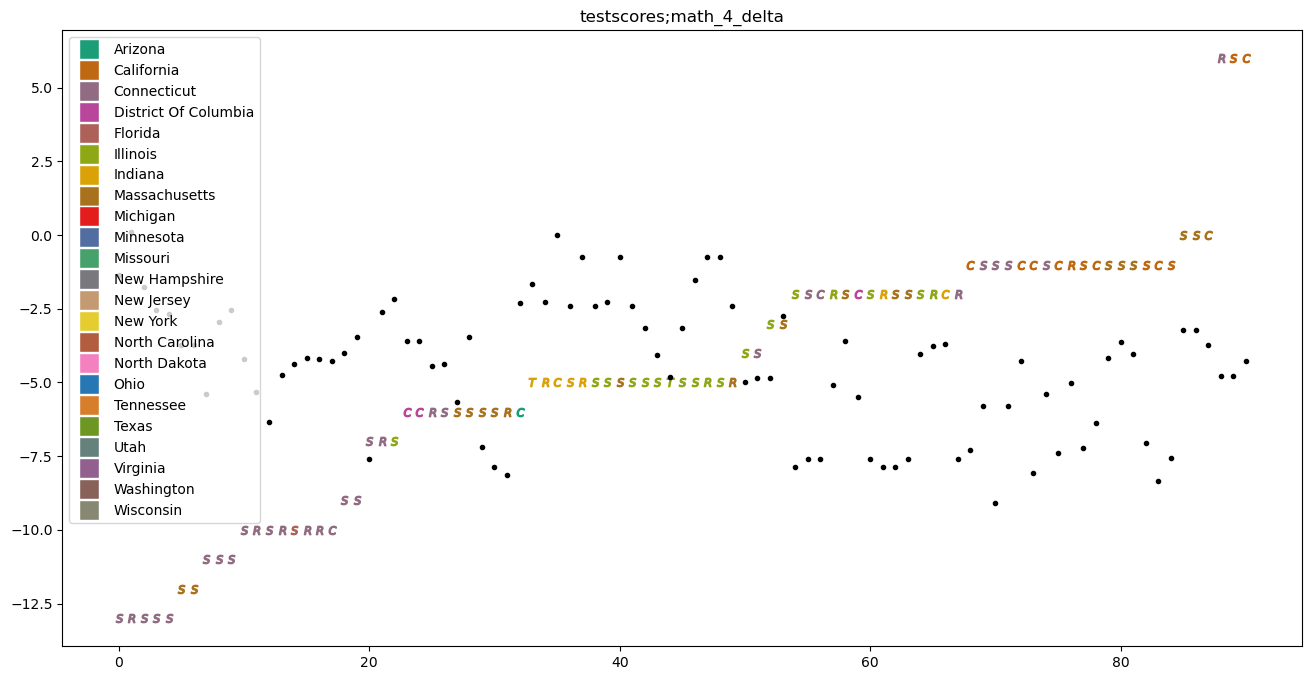

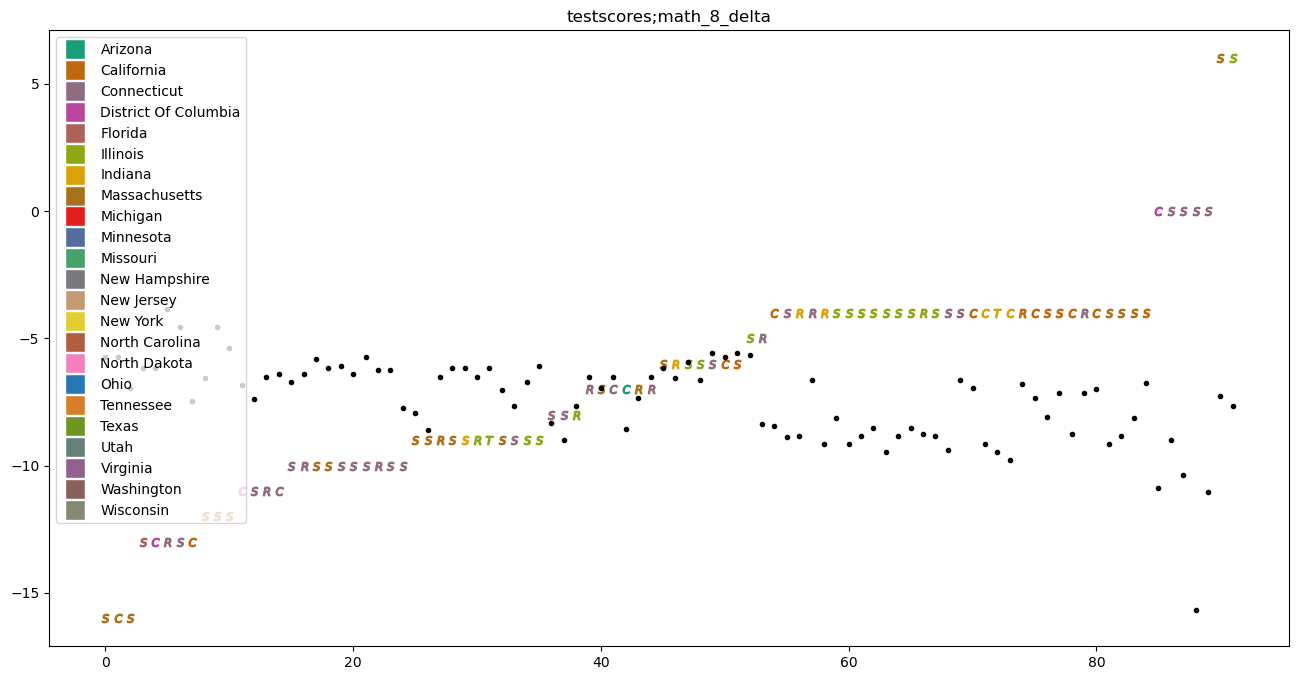

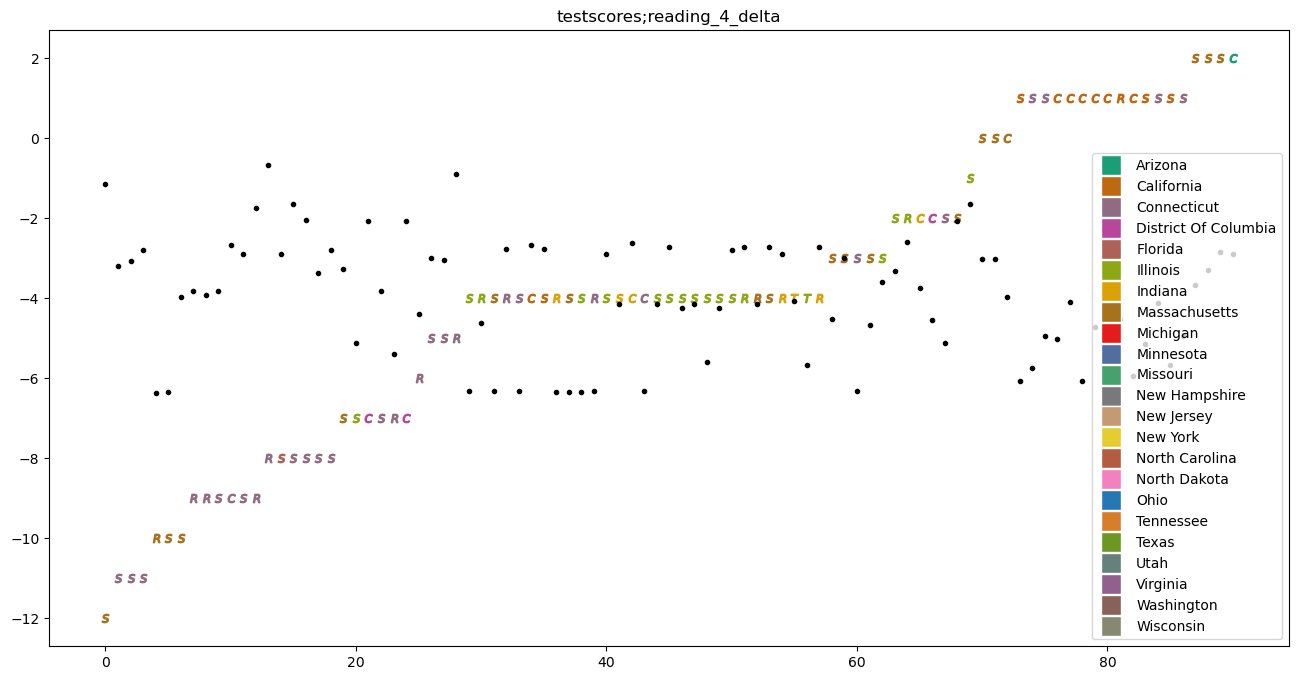

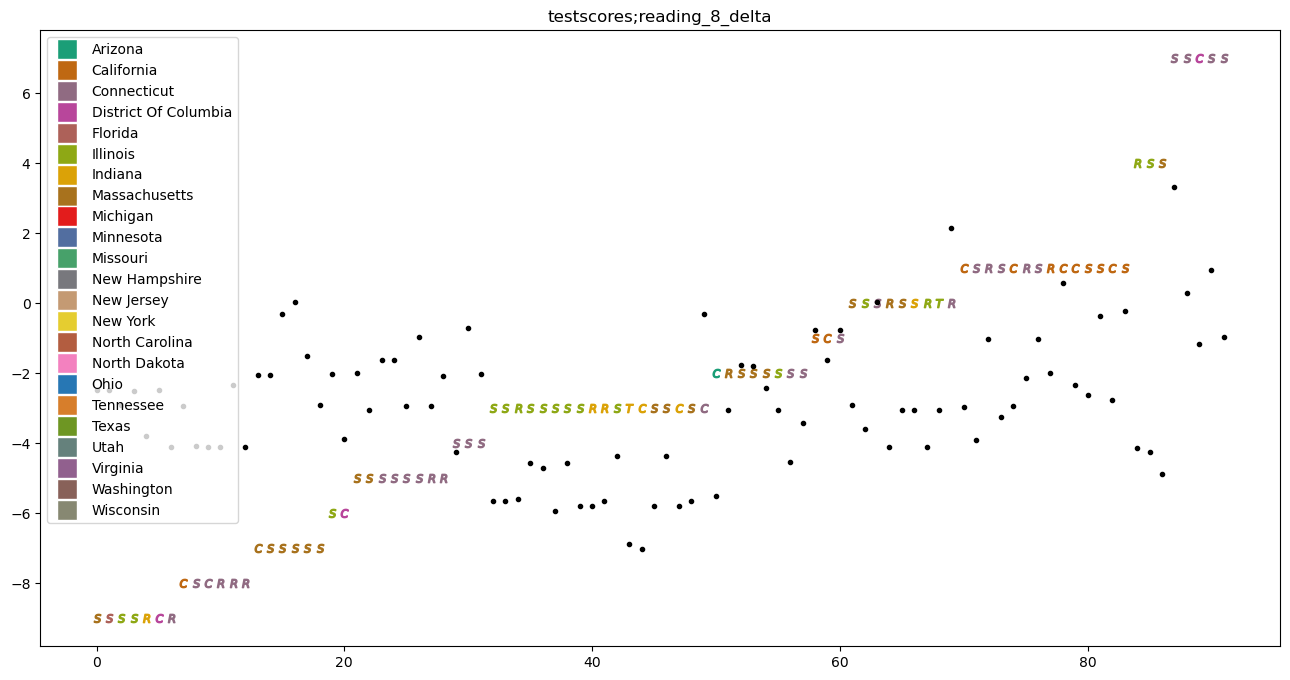

In [35]:
plot_residuals(five_fold_results, dataset)

-----------